In [2]:
!cp /Zip_Zhvi_AllHomes_1000.csv /home/jovyan/work/Zip_zhvi_AllHomes.csv

In [3]:
!cp /loan_1000.csv /home/jovyan/work/loan.csv

In [1]:
from pyspark.sql import SparkSession
spark = SparkSession \
    .builder \
    .appName("SparkTest") \
    .getOrCreate()
    
#df = spark.read.csv("../../../food-inspections.csv", header=True)
#df.show(5)

In [2]:
dfLC = spark.read.csv("loan.csv", inferSchema = True, header = True)
types = [(f.name, f.dataType) for f in dfLC.schema.fields]
types

[('id', StringType),
 ('member_id', StringType),
 ('loan_amnt', IntegerType),
 ('funded_amnt', IntegerType),
 ('funded_amnt_inv', DoubleType),
 ('term', StringType),
 ('int_rate', DoubleType),
 ('installment', DoubleType),
 ('grade', StringType),
 ('sub_grade', StringType),
 ('emp_title', StringType),
 ('emp_length', StringType),
 ('home_ownership', StringType),
 ('annual_inc', StringType),
 ('verification_status', StringType),
 ('issue_d', StringType),
 ('loan_status', StringType),
 ('pymnt_plan', StringType),
 ('url', StringType),
 ('desc', StringType),
 ('purpose', StringType),
 ('title', StringType),
 ('zip_code', StringType),
 ('addr_state', StringType),
 ('dti', StringType),
 ('delinq_2yrs', StringType),
 ('earliest_cr_line', StringType),
 ('inq_last_6mths', StringType),
 ('mths_since_last_delinq', StringType),
 ('mths_since_last_record', StringType),
 ('open_acc', StringType),
 ('pub_rec', StringType),
 ('revol_bal', StringType),
 ('revol_util', StringType),
 ('total_acc', Strin

In [3]:
dfZ = spark.read.csv("Zip_Zhvi_AllHomes.csv", inferSchema = True, header = True)
types = [(f.name, f.dataType) for f in dfZ.schema.fields]
types

[('RegionID', IntegerType),
 ('RegionName', IntegerType),
 ('City', StringType),
 ('State', StringType),
 ('Metro', StringType),
 ('CountyName', StringType),
 ('SizeRank', IntegerType),
 ('1996-04', IntegerType),
 ('1996-05', IntegerType),
 ('1996-06', IntegerType),
 ('1996-07', IntegerType),
 ('1996-08', IntegerType),
 ('1996-09', IntegerType),
 ('1996-10', IntegerType),
 ('1996-11', IntegerType),
 ('1996-12', IntegerType),
 ('1997-01', IntegerType),
 ('1997-02', IntegerType),
 ('1997-03', IntegerType),
 ('1997-04', IntegerType),
 ('1997-05', IntegerType),
 ('1997-06', IntegerType),
 ('1997-07', IntegerType),
 ('1997-08', IntegerType),
 ('1997-09', IntegerType),
 ('1997-10', IntegerType),
 ('1997-11', IntegerType),
 ('1997-12', IntegerType),
 ('1998-01', IntegerType),
 ('1998-02', IntegerType),
 ('1998-03', IntegerType),
 ('1998-04', IntegerType),
 ('1998-05', IntegerType),
 ('1998-06', IntegerType),
 ('1998-07', IntegerType),
 ('1998-08', IntegerType),
 ('1998-09', IntegerType),
 ('1

In [4]:
dfZ.count()

15561

In [361]:
#dfZ.select('RegionName').distinct().rdd.map(lambda r: r[0]).collect()

[45011,
 90019,
 87120,
 75149,
 91367,
 10462,
 75070,
 23455,
 14075,
 20020,
 96706,
 19131,
 85351,
 77057,
 77373,
 29483,
 33437,
 33615,
 94109,
 10032,
 19067,
 19149,
 8701,
 65203,
 33012,
 92618,
 23434,
 10128,
 6010,
 22003,
 19335,
 93065,
 30004,
 30606,
 92503,
 98122,
 90042,
 38111,
 60647,
 78748,
 45069,
 92553,
 4401,
 75243,
 87111,
 32246,
 33141,
 92057,
 75024,
 77479,
 27587,
 75217,
 90025,
 85205,
 32940,
 11234,
 85383,
 78753,
 30114,
 80538,
 33418,
 94115,
 60640,
 10011,
 30041,
 1201,
 60625,
 23464,
 90280,
 22192,
 93308,
 7306,
 37918,
 78664,
 33436,
 30281,
 31419,
 22030,
 58104,
 92234,
 76133,
 40601,
 11204,
 11213,
 94112,
 60402,
 28412,
 76549,
 77008,
 97229,
 22193,
 21222,
 78230,
 77407,
 75061,
 67212,
 28806,
 90046,
 85705,
 31907,
 30067,
 60643,
 8053,
 2169,
 98115,
 93257,
 29223,
 63021,
 11374,
 53209,
 19145,
 17603,
 33467,
 17331,
 21224,
 55124,
 19148,
 60004,
 30044,
 78501,
 42701,
 72034,
 10010,
 20147,
 29464,
 33319,

In [5]:
dfZ = dfZ.withColumn("zip_code_3_throwaway", dfZ.RegionName.substr(1,3))

In [76]:
dfZ.select("zip_code_3_throwaway").take(5)

[Row(zip_code_3_throwaway='100'),
 Row(zip_code_3_throwaway='606'),
 Row(zip_code_3_throwaway='100'),
 Row(zip_code_3_throwaway='774'),
 Row(zip_code_3_throwaway='606')]

In [6]:
dfLC.count()

2260668

In [83]:
dfLC.select('zip_code').distinct().rdd.map(lambda r: r[0]).collect()

['471xx',
 '223xx',
 '957xx',
 '371xx',
 '154xx',
 '751xx',
 '183xx',
 '756xx',
 '287xx',
 '179xx',
 '535xx',
 '895xx',
 '216xx',
 '436xx',
 '017xx',
 '446xx',
 '923xx',
 '159xx',
 '564xx',
 '973xx',
 '544xx',
 '780xx',
 '902xx',
 '731xx',
 '309xx',
 '660xx',
 '386xx',
 '713xx',
 '703xx',
 '601xx',
 '672xx',
 '850xx',
 '480xx',
 '339xx',
 '951xx',
 '765xx',
 '834xx',
 '292xx',
 '359xx',
 '360xx',
 '640xx',
 '021xx',
 '130xx',
 '356xx',
 '410xx',
 '712xx',
 '628xx',
 '782xx',
 '023xx',
 '301xx',
 '450xx',
 '265xx',
 '766xx',
 '302xx',
 '200xx',
 '553xx',
 '199xx',
 '433xx',
 '802xx',
 '337xx',
 '972xx',
 '063xx',
 '016xx',
 '427xx',
 '431xx',
 '953xx',
 '352xx',
 '912xx',
 '174xx',
 '206xx',
 '314xx',
 '145xx',
 '020xx',
 '718xx',
 '477xx',
 '984xx',
 '786xx',
 '926xx',
 '927xx',
 '014xx',
 '774xx',
 '605xx',
 '894xx',
 '209xx',
 '425xx',
 '435xx',
 '160xx',
 '077xx',
 '341xx',
 '119xx',
 '707xx',
 '981xx',
 '217xx',
 '370xx',
 '956xx',
 '644xx',
 '833xx',
 '290xx',
 '730xx',
 '992xx',


In [7]:
dfLC = dfLC.withColumn("zip_code_3", dfLC.zip_code.substr(1,3))

In [85]:
dfLC.select("zip_code_3").take(5)

[Row(zip_code_3='109'),
 Row(zip_code_3='713'),
 Row(zip_code_3='490'),
 Row(zip_code_3='985'),
 Row(zip_code_3='212')]

In [77]:
print(dfLC.count())
print(dfZ.count())

2260668
15561


In [8]:
dfZ.select("RegionName").summary().show()#this is zip code
#delete:
#RegionID
#City
#State
#Metro
#CountyName
#SizeRank 
dfZ = dfZ.select([c for c in dfZ.columns if c not in {'RegionID','City','State','Metro','CountyName','SizeRank'}])                   
#delete all index values apart from the latest
dfZ = dfZ.select([c for c in dfZ.columns if c not in {'1996-04','1996-05','1996-06','1996-07','1996-08','1996-09','1996-10','1996-11','1996-12','1997-01','1997-02','1997-03','1997-04','1997-05','1997-06','1997-07','1997-08','1997-09','1997-10','1997-11','1997-12','1998-01','1998-02','1998-03','1998-04','1998-05','1998-06','1998-07','1998-08','1998-09','1998-10','1998-11','1998-12','1999-01','1999-02','1999-03','1999-04','1999-05','1999-06','1999-07','1999-08','1999-09','1999-10','1999-11','1999-12','2000-01','2000-02','2000-03','2000-04','2000-05','2000-06','2000-07','2000-08','2000-09','2000-10','2000-11','2000-12','2001-01','2001-02','2001-03','2001-04','2001-05','2001-06','2001-07','2001-08','2001-09','2001-10','2001-11','2001-12','2002-01','2002-02','2002-03','2002-04','2002-05','2002-06','2002-07','2002-08','2002-09','2002-10','2002-11','2002-12','2003-01','2003-02','2003-03','2003-04','2003-05','2003-06','2003-07','2003-08','2003-09','2003-10','2003-11','2003-12','2004-01','2004-02','2004-03','2004-04','2004-05','2004-06','2004-07','2004-08','2004-09','2004-10','2004-11','2004-12','2005-01','2005-02','2005-03','2005-04','2005-05','2005-06','2005-07','2005-08','2005-09','2005-10','2005-11','2005-12','2006-01','2006-02','2006-03','2006-04','2006-05','2006-06','2006-07','2006-08','2006-09','2006-10','2006-11','2006-12','2007-01','2007-02','2007-03','2007-04','2007-05','2007-06','2007-07','2007-08','2007-09','2007-10','2007-11','2007-12','2008-01','2008-02','2008-03','2008-04','2008-05','2008-06','2008-07','2008-08','2008-09','2008-10','2008-11','2008-12','2009-01','2009-02','2009-03','2009-04','2009-05','2009-06','2009-07','2009-08','2009-09','2009-10','2009-11','2009-12','2010-01','2010-02','2010-03','2010-04','2010-05','2010-06','2010-07','2010-08','2010-09','2010-10','2010-11','2010-12','2011-01','2011-02','2011-03','2011-04','2011-05','2011-06','2011-07','2011-08','2011-09','2011-10','2011-11','2011-12','2012-01','2012-02','2012-03','2012-04','2012-05','2012-06','2012-07','2012-08','2012-09','2012-10','2012-11','2012-12','2013-01','2013-02','2013-03','2013-04','2013-05','2013-06','2013-07','2013-08','2013-09','2013-10','2013-11','2013-12','2014-01','2014-02','2014-03','2014-04','2014-05','2014-06','2014-07','2014-08','2014-09','2014-10','2014-11','2014-12','2015-01','2015-02','2015-03','2015-04','2015-05','2015-06','2015-07','2015-08','2015-09','2015-10','2015-11','2015-12','2016-01','2016-02','2016-03','2016-04','2016-05','2016-06','2016-07','2016-08','2016-09','2016-10','2016-11','2016-12','2017-01','2017-02','2017-03','2017-04','2017-05','2017-06','2017-07','2017-08','2017-09','2017-10','2017-11','2017-12','2018-01','2018-02','2018-03','2018-04','2018-05','2018-06','2018-07','2018-08','2018-09','2018-10','2018-11','2018-12','2019-01','2019-02'}])

+-------+------------------+
|summary|        RegionName|
+-------+------------------+
|  count|             15561|
|   mean|47639.435768909454|
| stddev|29023.983159276242|
|    min|              1001|
|    25%|             22202|
|    50%|             45458|
|    75%|             73801|
|    max|             99901|
+-------+------------------+



In [9]:
dfZ.dtypes

[('RegionName', 'int'), ('2019-03', 'int'), ('zip_code_3_throwaway', 'string')]

In [10]:
#done with this field now. Delete the column
dfZ = dfZ.select([c for c in dfZ.columns if c not in {'RegionName'}])                   

In [11]:
#dfZ.withColumn("IndexValue", dfZ.select('2019-03'))
dfZ = dfZ.withColumn("IndexValue", dfZ["2019-03"])
dfZ.dtypes

[('2019-03', 'int'), ('zip_code_3_throwaway', 'string'), ('IndexValue', 'int')]

In [12]:
dfZ_1 = dfZ.groupBy("zip_code_3_throwaway").mean('IndexValue').collect()
dfZ_1[0:5]

[Row(zip_code_3_throwaway='296', avg(IndexValue)=174180.0),
 Row(zip_code_3_throwaway='467', avg(IndexValue)=146823.07692307694),
 Row(zip_code_3_throwaway='829', avg(IndexValue)=216325.0),
 Row(zip_code_3_throwaway='675', avg(IndexValue)=131730.0),
 Row(zip_code_3_throwaway='691', avg(IndexValue)=147700.0)]

In [13]:
dfZ = spark.createDataFrame(data = dfZ_1, schema = ['zip_code_3_throwaway', 'IndexValueMean'])

In [14]:
dfZ.show(5)

+--------------------+------------------+
|zip_code_3_throwaway|    IndexValueMean|
+--------------------+------------------+
|                 296|          174180.0|
|                 467|146823.07692307694|
|                 829|          216325.0|
|                 675|          131730.0|
|                 691|          147700.0|
+--------------------+------------------+
only showing top 5 rows



In [15]:
data = dfLC.join(dfZ, dfLC.zip_code_3 == dfZ.zip_code_3_throwaway).select(dfLC["*"],dfZ["*"])

In [86]:
data.count()

2055263

In [16]:
data = data.select([c for c in data.columns if c not in {'zip_code_3_throwaway'}])


In [96]:
data.dtypes

[('id', 'string'),
 ('member_id', 'string'),
 ('loan_amnt', 'int'),
 ('funded_amnt', 'int'),
 ('funded_amnt_inv', 'int'),
 ('term', 'string'),
 ('int_rate', 'double'),
 ('installment', 'double'),
 ('grade', 'string'),
 ('sub_grade', 'string'),
 ('emp_title', 'string'),
 ('emp_length', 'string'),
 ('home_ownership', 'string'),
 ('annual_inc', 'int'),
 ('verification_status', 'string'),
 ('issue_d', 'string'),
 ('loan_status', 'string'),
 ('pymnt_plan', 'string'),
 ('url', 'string'),
 ('desc', 'string'),
 ('purpose', 'string'),
 ('title', 'string'),
 ('zip_code', 'string'),
 ('addr_state', 'string'),
 ('dti', 'double'),
 ('delinq_2yrs', 'int'),
 ('earliest_cr_line', 'string'),
 ('inq_last_6mths', 'int'),
 ('mths_since_last_delinq', 'int'),
 ('mths_since_last_record', 'int'),
 ('open_acc', 'int'),
 ('pub_rec', 'int'),
 ('revol_bal', 'int'),
 ('revol_util', 'double'),
 ('total_acc', 'int'),
 ('initial_list_status', 'string'),
 ('out_prncp', 'double'),
 ('out_prncp_inv', 'double'),
 ('total

In [17]:
data = data.withColumn("funded_ratio", data.funded_amnt_inv / data.loan_amnt)
data.select("funded_ratio").dtypes

[('funded_ratio', 'double')]

In [18]:
from pyspark.ml.feature import CountVectorizer
from pyspark.sql.functions import col, split

data = data.withColumn("term_array", split(col("term")," "))
termVectorizer = CountVectorizer(inputCol="term_array", outputCol="term_ohe", vocabSize=3, minDF=1.0)
termVectorizer_model = termVectorizer.fit(data)
data_ohe = termVectorizer_model.transform(data)
data_ohe = data_ohe.select([c for c in data_ohe.columns if c not in {'term_array','term'}])
data = data_ohe


In [19]:
#convert all values to lowercase
from pyspark.sql.functions import lower, col
data = data.withColumn('emp_title', lower(col('emp_title')))


In [20]:
from pyspark.sql.functions import when, col, coalesce, array
fill = ""
data = data.withColumn('emp_title_filled', when(col("emp_title").isNull(), fill).otherwise(col("emp_title")))

In [21]:
from pyspark.ml.feature import CountVectorizer
data_ohe = data.withColumn("emp_title_array", split(col("emp_title_filled")," "))
emp_titleVectorizer = CountVectorizer(inputCol="emp_title_array", outputCol="emp_title_ohe", vocabSize=10, minDF=1.0)
emp_title_Vectorizer_model = emp_titleVectorizer.fit(data_ohe)
data_ohe = emp_title_Vectorizer_model.transform(data_ohe)
data_ohe = data_ohe.select([c for c in data_ohe.columns if c not in {'emp_title','emp_title_filled','emp_title_array'}])


In [93]:
data_ohe.select(["emp_title_ohe"]).show(20)


+--------------------+
|       emp_title_ohe|
+--------------------+
|(10,[1,3],[1.0,1.0])|
|          (10,[],[])|
|      (10,[1],[1.0])|
|          (10,[],[])|
|      (10,[4],[1.0])|
|(10,[0,9],[1.0,1.0])|
|          (10,[],[])|
|          (10,[],[])|
|      (10,[9],[1.0])|
|      (10,[7],[1.0])|
|          (10,[],[])|
|          (10,[],[])|
|      (10,[5],[1.0])|
|          (10,[],[])|
|          (10,[],[])|
|          (10,[],[])|
|          (10,[],[])|
|          (10,[],[])|
|          (10,[],[])|
|      (10,[5],[1.0])|
+--------------------+
only showing top 20 rows



In [22]:
data_ohe.count()
data_ohe = data_ohe.select([c for c in data_ohe.columns if c not in {'int_rate','installment','grade','sub_grade'}])
#data_ohe.describe()

In [95]:
#data_ohe.select('emp_length').show(2)

data_ohe.select('emp_length').distinct().rdd.map(lambda r: r[0]).collect()

['5 years',
 '9 years',
 '1 year',
 'n/a',
 '2 years',
 '7 years',
 '8 years',
 '4 years',
 '6 years',
 '3 years',
 '10+ years',
 '< 1 year']

In [23]:
fill = "0 years"
data_ohe = data_ohe.withColumn('emp_length', when(col("emp_length")=='n/a', fill).otherwise(col("emp_length")))
data_ohe = data_ohe.withColumn('emp_length', when(col("emp_length")=='< 1 year', fill).otherwise(col("emp_length")))
fill = "10 years"
data_ohe = data_ohe.withColumn('emp_length', when(col("emp_length")=='10+ years', fill).otherwise(col("emp_length")))
from pyspark.sql.functions import *
data_ohe = data_ohe.withColumn('emp_length', regexp_replace('emp_length', ' years', ''))
data_ohe = data_ohe.withColumn('emp_length', regexp_replace('emp_length', ' year', ''))
#data_ohe = data_ohe.withColumn("emp_length", data_ohe["emp_length"].cast("integer"))


In [24]:
data_ohe = data_ohe.withColumn("emp_length", data_ohe["emp_length"].cast("integer"))

In [25]:
from pyspark.ml.feature import CountVectorizer
data_ohe = data_ohe.withColumn("home_ownership_array", split(col("home_ownership")," "))
emp_titleVectorizer = CountVectorizer(inputCol="home_ownership_array", outputCol="home_ownership_ohe", vocabSize=4, minDF=1.0)
emp_title_Vectorizer_model = emp_titleVectorizer.fit(data_ohe)
data_ohe = emp_title_Vectorizer_model.transform(data_ohe)
data_ohe = data_ohe.select([c for c in data_ohe.columns if c not in {'home_ownership_array','home_ownership'}])



In [26]:
from pyspark.ml.feature import CountVectorizer
data_ohe = data_ohe.withColumn("verification_status_array", split(col("verification_status")," "))
emp_titleVectorizer = CountVectorizer(inputCol="verification_status_array", outputCol="verification_status_ohe", vocabSize=4, minDF=1.0)
emp_title_Vectorizer_model = emp_titleVectorizer.fit(data_ohe)
data_ohe = emp_title_Vectorizer_model.transform(data_ohe)
data_ohe = data_ohe.select([c for c in data_ohe.columns if c not in {'verification_status','verification_status_array'}])



In [27]:
data_ohe = data_ohe.select([c for c in data_ohe.columns if c not in {'desc','issue_d','loan_status','pymnt_plan','url'}])



In [162]:
#data_ohe.select('purpose').distinct().rdd.map(lambda r: r[0]).collect()

['other',
 'small_business',
 'debt_consolidation',
 'credit_card',
 'moving',
 'vacation',
 'house',
 'car',
 'major_purchase',
 'medical',
 'home_improvement']

In [28]:
from pyspark.ml.feature import CountVectorizer
data_ohe = data_ohe.withColumn("purpose_array", split(col("purpose")," "))
emp_titleVectorizer = CountVectorizer(inputCol="purpose_array", outputCol="purpose_ohe", vocabSize=4, minDF=1.0)
emp_title_Vectorizer_model = emp_titleVectorizer.fit(data_ohe)
data_ohe = emp_title_Vectorizer_model.transform(data_ohe)
data_ohe = data_ohe.select([c for c in data_ohe.columns if c not in {'purpose_array','purpose'}])


In [164]:
#data_ohe.select('purpose_ohe').show(5)

+-------------+
|  purpose_ohe|
+-------------+
|(4,[0],[1.0])|
|(4,[0],[1.0])|
|    (4,[],[])|
|(4,[0],[1.0])|
|(4,[0],[1.0])|
+-------------+
only showing top 5 rows



In [165]:
#data_ohe.select('title').distinct().rdd.map(lambda r: r[0]).collect()

['Major purchase',
 'Other',
 'Credit card refinancing',
 'Home buying',
 'Home improvement',
 'Business',
 'Vacation',
 'Medical expenses',
 'Car financing',
 'Debt consolidation',
 'Moving and relocation']

In [29]:
fill = "no title"
data_ohe = data_ohe.withColumn('title', when(col("title").isNull(), fill).otherwise(col("title")))


In [30]:
from pyspark.ml.feature import CountVectorizer
data_ohe = data_ohe.withColumn("title_array", split(col("title")," "))
emp_titleVectorizer = CountVectorizer(inputCol="title_array", outputCol="title_ohe", vocabSize=4, minDF=1.0)
emp_title_Vectorizer_model = emp_titleVectorizer.fit(data_ohe)
data_ohe = emp_title_Vectorizer_model.transform(data_ohe)
data_ohe = data_ohe.select([c for c in data_ohe.columns if c not in {'title_array','title'}])


In [31]:
#data_ohe.withColumn("addr_state", regexp_replace(col("addr_state") , "(\\s+)" , "$1 state" ) ).show(5)
data_ohe = data_ohe.withColumn("addr_state", concat(col("addr_state"), lit(" State")))

In [32]:
from pyspark.ml.feature import CountVectorizer
data_ohe = data_ohe.withColumn("addr_state_array", split(col("addr_state")," "))
emp_titleVectorizer = CountVectorizer(inputCol="addr_state_array", outputCol="addr_state_ohe", vocabSize=4, minDF=1.0)
emp_title_Vectorizer_model = emp_titleVectorizer.fit(data_ohe)
data_ohe = emp_title_Vectorizer_model.transform(data_ohe)
data_ohe = data_ohe.select([c for c in data_ohe.columns if c not in {'addr_state_array','addr_state'}])


In [36]:
data_ohe.select("earliest_cr_line").summary().show()
data_ohe.select("earliest_cr_line").describe()

+-------+----------------+
|summary|earliest_cr_line|
+-------+----------------+
|  count|             711|
|   mean|            null|
| stddev|            null|
|    min|        Apr-1978|
|    25%|            null|
|    50%|            null|
|    75%|            null|
|    max|        Sep-2012|
+-------+----------------+



DataFrame[summary: string, earliest_cr_line: string]

In [33]:
fill = "May-2019"
data_ohe = data_ohe.withColumn('earliest_cr_line', when(col("earliest_cr_line").isNull(), fill).otherwise(col("earliest_cr_line")))


In [34]:
data_ohe = data_ohe.withColumn('earliest_cr_line', unix_timestamp('earliest_cr_line', 'MMM-yyy').alias('earliest_cr_line_date'))


In [110]:
data_ohe.select("earliest_cr_line").show(1)

+----------------+
|earliest_cr_line|
+----------------+
|      1075615200|
+----------------+
only showing top 1 row



In [40]:
data_ohe.select("initial_list_status").summary().show()

+-------+-------------------+
|summary|initial_list_status|
+-------+-------------------+
|  count|                711|
|   mean|               null|
| stddev|               null|
|    min|                  f|
|    25%|               null|
|    50%|               null|
|    75%|               null|
|    max|                  w|
+-------+-------------------+



In [35]:

fill = "unknown"
data_ohe = data_ohe.withColumn('initial_list_status', when(col("initial_list_status").isNull(), fill).otherwise(col("initial_list_status")))
data_ohe = data_ohe.withColumn("initial_list_status", concat(col("initial_list_status"), lit(" state")))

In [36]:
from pyspark.ml.feature import CountVectorizer
data_ohe = data_ohe.withColumn("initial_list_status_array", split(col("initial_list_status")," "))
emp_titleVectorizer = CountVectorizer(inputCol="initial_list_status_array", outputCol="initial_list_status_ohe", vocabSize=4, minDF=1.0)
emp_title_Vectorizer_model = emp_titleVectorizer.fit(data_ohe)
data_ohe = emp_title_Vectorizer_model.transform(data_ohe)
data_ohe = data_ohe.select([c for c in data_ohe.columns if c not in {'initial_list_status','initial_list_status_array'}])


In [37]:
data_ohe = data_ohe.select([c for c in data_ohe.columns if c not in {'out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','next_pymnt_d'}])


In [122]:
data_ohe.select("last_credit_pull_d").describe().show()
data_ohe.select("last_credit_pull_d").summary()


+-------+------------------+
|summary|last_credit_pull_d|
+-------+------------------+
|  count|               711|
|   mean|              null|
| stddev|              null|
|    min|          Dec-2018|
|    max|          Jan-2019|
+-------+------------------+



DataFrame[summary: string, last_credit_pull_d: string]

In [38]:
data_ohe = data_ohe.withColumn('last_credit_pull_d', unix_timestamp('last_credit_pull_d', 'MMM-yyy').alias('last_credit_pull_d_date'))


In [119]:
data_ohe.select("last_credit_pull_d").describe().show()
data_ohe.select("last_credit_pull_d").summary()


+-------+-------------------+
|summary| last_credit_pull_d|
+-------+-------------------+
|  count|            2055195|
|   mean|1.533991124510521E9|
| stddev|3.001623785126665E7|
|    min|         1177995600|
|    max|         1551420000|
+-------+-------------------+



DataFrame[summary: string, last_credit_pull_d: string]

In [39]:
data_ohe = data_ohe.select([c for c in data_ohe.columns if c not in {'policy_code'}])



In [126]:
data_ohe.select("application_type").describe().show()

+-------+----------------+
|summary|application_type|
+-------+----------------+
|  count|             711|
|   mean|            null|
| stddev|            null|
|    min|      Individual|
|    max|       Joint App|
+-------+----------------+



In [40]:
data_ohe = data_ohe.withColumn("application_type", concat(col("application_type"), lit(" application")))
from pyspark.ml.feature import CountVectorizer
data_ohe = data_ohe.withColumn("application_type_array", split(col("application_type")," "))
emp_titleVectorizer = CountVectorizer(inputCol="application_type_array", outputCol="application_type_ohe", vocabSize=4, minDF=1.0)
emp_title_Vectorizer_model = emp_titleVectorizer.fit(data_ohe)
data_ohe = emp_title_Vectorizer_model.transform(data_ohe)
data_ohe = data_ohe.select([c for c in data_ohe.columns if c not in {'application_type','application_type_array'}])


In [128]:
data_ohe.select("application_type_ohe").show(3)

+--------------------+
|application_type_ohe|
+--------------------+
| (4,[0,1],[1.0,1.0])|
| (4,[0,1],[1.0,1.0])|
| (4,[0,1],[1.0,1.0])|
+--------------------+
only showing top 3 rows



In [41]:
data_ohe = data_ohe.select([c for c in data_ohe.columns if c not in {'verification_status_joint','acc_now_delinq','hardship_type','hardship_reason','hardship_status','deferral_term','hardship_amount','hardship_start_date','hardship_end_date','payment_plan_start_date','hardship_length','hardship_dpd','hardship_loan_status','orig_projected_additional_accrued_interest','hardship_payoff_balance_amount','hardship_last_payment_amount','debt_settlement_flag','debt_settlement_flag_date','settlement_status','settlement_date','settlement_amount','settlement_percentage','settlement_term','hardship_flag'}])


In [130]:
data.select("disbursement_method").summary().show()
data.select("hardship_flag").summary().show()

+-------+-------------------+
|summary|disbursement_method|
+-------+-------------------+
|  count|                711|
|   mean|               null|
| stddev|               null|
|    min|               Cash|
|    25%|               null|
|    50%|               null|
|    75%|               null|
|    max|          DirectPay|
+-------+-------------------+

+-------+-------------+
|summary|hardship_flag|
+-------+-------------+
|  count|          711|
|   mean|         null|
| stddev|         null|
|    min|            N|
|    25%|         null|
|    50%|         null|
|    75%|         null|
|    max|            N|
+-------+-------------+



In [42]:
#disbursement_method
fill = "unknown"
data_ohe = data_ohe.withColumn('disbursement_method', when(col("disbursement_method").isNull(), fill).otherwise(col("disbursement_method")))
data_ohe = data_ohe.withColumn("disbursement_method", concat(col("disbursement_method"), lit(" method")))
from pyspark.ml.feature import CountVectorizer
data_ohe = data_ohe.withColumn("disbursement_method_array", split(col("disbursement_method")," "))
emp_titleVectorizer = CountVectorizer(inputCol="disbursement_method_array", outputCol="disbursement_method_ohe", vocabSize=4, minDF=1.0)
emp_title_Vectorizer_model = emp_titleVectorizer.fit(data_ohe)
data_ohe = emp_title_Vectorizer_model.transform(data_ohe)
data_ohe = data_ohe.select([c for c in data_ohe.columns if c not in {'disbursement_method','disbursement_method_array'}])


In [423]:
data_ohe.describe()


#convert to integer
#loan_amnt
#funded_amnt
#funded_amnt_inv
#annual_inc
#revol_bal
#annual_inc_joint
#tot_coll_amt
#tot_cur_bal
#total_bal_il
#max_bal_bc
#all_util
#total_rev_hi_lim
#total_cu_tl
#inq_last_12m
#acc_open_past_24mths
#avg_cur_bal
#bc_open_to_buy
#bc_util
#chargeoff_within_12_mths
#delinq_amnt
#mo_sin_old_il_acct
#mo_sin_old_rev_tl_op
#mo_sin_rcnt_rev_tl_op
#mo_sin_rcnt_tl
#mort_acc
#mths_since_recent_bc
#mths_since_recent_bc_dlq
#mths_since_recent_inq
#mths_since_recent_revol_delinq
#num_accts_ever_120_pd
#num_actv_bc_tl
#num_actv_rev_tl
#num_bc_sats
#num_bc_tl
#num_il_tl
#num_op_rev_tl
#num_rev_accts
#num_rev_tl_bal_gt_0
#num_sats
#num_tl_120dpd_2m
#num_tl_30dpd
#num_tl_90g_dpd_24m
#num_tl_op_past_12m
#pct_tl_nvr_dlq
#percent_bc_gt_75
#pub_rec_bankruptcies
#tax_liens
#tot_hi_cred_lim
#total_bal_ex_mort
#total_bc_limit
#total_il_high_credit_limit
#revol_bal_joint
#sec_app_earliest_cr_line
#sec_app_inq_last_6mths
#sec_app_mort_acc
#sec_app_open_acc
#sec_app_revol_util
#sec_app_open_act_il
#sec_app_num_rev_accts
#sec_app_chargeoff_within_12_mths
#sec_app_collections_12_mths_ex_med
#sec_app_mths_since_last_major_derog
#IndexValueMean

#convert to real
#dti
#dti_joint
#funded_ratio

#tbc
#delinq_2yrs
#earliest_cr_line
#inq_last_6mths
#mths_since_last_delinq
#mths_since_last_record#
#open_acc
#pub_rec
#revol_util
#total_acc
#last_credit_pull_d
#collections_12_mths_ex_med
#mths_since_last_major_derog
#open_acc_6m
#open_act_il
#open_il_12m
#open_il_24m
#mths_since_rcnt_il
#il_util
#open_rv_12m
#open_rv_24m
#inq_fi

DataFrame[summary: string, id: string, member_id: string, loan_amnt: string, funded_amnt: string, funded_amnt_inv: string, annual_inc: string, zip_code: string, dti: string, delinq_2yrs: string, earliest_cr_line: string, inq_last_6mths: string, mths_since_last_delinq: string, mths_since_last_record: string, open_acc: string, pub_rec: string, revol_bal: string, revol_util: string, total_acc: string, last_credit_pull_d: string, collections_12_mths_ex_med: string, mths_since_last_major_derog: string, annual_inc_joint: string, dti_joint: string, tot_coll_amt: string, tot_cur_bal: string, open_acc_6m: string, open_act_il: string, open_il_12m: string, open_il_24m: string, mths_since_rcnt_il: string, total_bal_il: string, il_util: string, open_rv_12m: string, open_rv_24m: string, max_bal_bc: string, all_util: string, total_rev_hi_lim: string, inq_fi: string, total_cu_tl: string, inq_last_12m: string, acc_open_past_24mths: string, avg_cur_bal: string, bc_open_to_buy: string, bc_util: string, c

In [43]:
#drop:
#id
#member_id
#zip_code
data_ohe = data_ohe.select([c for c in data_ohe.columns if c not in {'id','member_id','zip_code'}])


In [44]:
#OHE
#zip_code_3


data_ohe = data_ohe.withColumn("zip_code_3", concat(col("zip_code_3"), lit(" zip")))
from pyspark.ml.feature import CountVectorizer
data_ohe = data_ohe.withColumn("zip_code_3_array", split(col("zip_code_3")," "))
emp_titleVectorizer = CountVectorizer(inputCol="zip_code_3_array", outputCol="zip_code_3_ohe", vocabSize=4, minDF=1.0)
emp_title_Vectorizer_model = emp_titleVectorizer.fit(data_ohe)
data_ohe = emp_title_Vectorizer_model.transform(data_ohe)
data_ohe = data_ohe.select([c for c in data_ohe.columns if c not in {'zip_code_3','zip_code_3_array'}])




In [45]:
data_ohe.select('sec_app_earliest_cr_line').summary().show()
data_ohe = data_ohe.withColumn('sec_app_earliest_cr_line', unix_timestamp('sec_app_earliest_cr_line', 'MMM-yyy').alias('sec_app_earliest_cr_line'))
data_ohe.select('sec_app_earliest_cr_line').summary().show()


+-------+------------------------+
|summary|sec_app_earliest_cr_line|
+-------+------------------------+
|  count|                   99092|
|   mean|                     0.0|
| stddev|                     NaN|
|    min|                       0|
|    25%|                     0.0|
|    50%|                     0.0|
|    75%|                     0.0|
|    max|                Sep-2017|
+-------+------------------------+

+-------+------------------------+
|summary|sec_app_earliest_cr_line|
+-------+------------------------+
|  count|                   99091|
|   mean|    1.0369728664480125E9|
| stddev|     2.403124378026347E8|
|    min|             -1130954400|
|    25%|               920268000|
|    50%|              1080799200|
|    75%|              1180674000|
|    max|              1527829200|
+-------+------------------------+



In [46]:
data_ohe.dtypes

[('loan_amnt', 'int'),
 ('funded_amnt', 'int'),
 ('funded_amnt_inv', 'double'),
 ('emp_length', 'int'),
 ('annual_inc', 'string'),
 ('dti', 'string'),
 ('delinq_2yrs', 'string'),
 ('earliest_cr_line', 'bigint'),
 ('inq_last_6mths', 'string'),
 ('mths_since_last_delinq', 'string'),
 ('mths_since_last_record', 'string'),
 ('open_acc', 'string'),
 ('pub_rec', 'string'),
 ('revol_bal', 'string'),
 ('revol_util', 'string'),
 ('total_acc', 'string'),
 ('last_credit_pull_d', 'bigint'),
 ('collections_12_mths_ex_med', 'string'),
 ('mths_since_last_major_derog', 'string'),
 ('annual_inc_joint', 'string'),
 ('dti_joint', 'string'),
 ('tot_coll_amt', 'string'),
 ('tot_cur_bal', 'string'),
 ('open_acc_6m', 'string'),
 ('open_act_il', 'string'),
 ('open_il_12m', 'string'),
 ('open_il_24m', 'string'),
 ('mths_since_rcnt_il', 'string'),
 ('total_bal_il', 'string'),
 ('il_util', 'string'),
 ('open_rv_12m', 'string'),
 ('open_rv_24m', 'string'),
 ('max_bal_bc', 'string'),
 ('all_util', 'string'),
 ('to

In [47]:
#data_ohe.select('annual_inc').summary().show()
data_ohe = data_ohe.withColumn("annual_inc", data_ohe["annual_inc"].cast("integer")) \
  .withColumn("dti", data_ohe["dti"].cast("double")) \
  .withColumn("delinq_2yrs", data_ohe["delinq_2yrs"].cast("integer")) \
  .withColumn("inq_last_6mths", data_ohe["inq_last_6mths"].cast("integer")) \
  .withColumn("mths_since_last_delinq", data_ohe["mths_since_last_delinq"].cast("integer")) \
  .withColumn("mths_since_last_record", data_ohe["mths_since_last_record"].cast("integer")) \
  .withColumn("open_acc", data_ohe["open_acc"].cast("integer")) \
  .withColumn("pub_rec", data_ohe["pub_rec"].cast("integer")) \
  .withColumn("revol_bal", data_ohe["revol_bal"].cast("integer")) \
  .withColumn("revol_util", data_ohe["revol_util"].cast("integer")) \
  .withColumn("total_acc", data_ohe["total_acc"].cast("integer")) \
  .withColumn("collections_12_mths_ex_med", data_ohe["collections_12_mths_ex_med"].cast("integer")) \
  .withColumn("mths_since_last_major_derog", data_ohe["mths_since_last_major_derog"].cast("integer")) \
  .withColumn("annual_inc_joint", data_ohe["annual_inc_joint"].cast("integer")) \
  .withColumn("dti_joint", data_ohe["dti_joint"].cast("double")) \
  .withColumn("tot_coll_amt", data_ohe["tot_coll_amt"].cast("integer")) \
  .withColumn("tot_cur_bal", data_ohe["tot_cur_bal"].cast("integer")) \
  .withColumn("open_acc_6m", data_ohe["open_acc_6m"].cast("integer")) \
  .withColumn("open_act_il", data_ohe["open_act_il"].cast("integer")) \
  .withColumn("open_il_12m", data_ohe["open_il_12m"].cast("integer")) \
  .withColumn("open_il_24m", data_ohe["open_il_24m"].cast("integer")) \
  .withColumn("mths_since_rcnt_il", data_ohe["mths_since_rcnt_il"].cast("integer")) \
  .withColumn("total_bal_il", data_ohe["total_bal_il"].cast("integer")) \
  .withColumn("il_util", data_ohe["il_util"].cast("integer")) \
  .withColumn("open_rv_12m", data_ohe["open_rv_12m"].cast("integer")) \
  .withColumn("open_rv_24m", data_ohe["open_rv_24m"].cast("integer")) \
  .withColumn("max_bal_bc", data_ohe["max_bal_bc"].cast("integer")) \
  .withColumn("all_util", data_ohe["all_util"].cast("integer")) \
  .withColumn("total_rev_hi_lim", data_ohe["total_rev_hi_lim"].cast("integer")) \
  .withColumn("inq_fi", data_ohe["inq_fi"].cast("integer")) \
  .withColumn("total_cu_tl", data_ohe["total_cu_tl"].cast("integer")) \
  .withColumn("inq_last_12m", data_ohe["inq_last_12m"].cast("integer")) \
  .withColumn("avg_cur_bal", data_ohe["avg_cur_bal"].cast("integer")) \
  .withColumn("bc_util", data_ohe["bc_util"].cast("integer"))


In [48]:
data_ohe.dtypes

[('loan_amnt', 'int'),
 ('funded_amnt', 'int'),
 ('funded_amnt_inv', 'double'),
 ('emp_length', 'int'),
 ('annual_inc', 'int'),
 ('dti', 'double'),
 ('delinq_2yrs', 'int'),
 ('earliest_cr_line', 'bigint'),
 ('inq_last_6mths', 'int'),
 ('mths_since_last_delinq', 'int'),
 ('mths_since_last_record', 'int'),
 ('open_acc', 'int'),
 ('pub_rec', 'int'),
 ('revol_bal', 'int'),
 ('revol_util', 'int'),
 ('total_acc', 'int'),
 ('last_credit_pull_d', 'bigint'),
 ('collections_12_mths_ex_med', 'int'),
 ('mths_since_last_major_derog', 'int'),
 ('annual_inc_joint', 'int'),
 ('dti_joint', 'double'),
 ('tot_coll_amt', 'int'),
 ('tot_cur_bal', 'int'),
 ('open_acc_6m', 'int'),
 ('open_act_il', 'int'),
 ('open_il_12m', 'int'),
 ('open_il_24m', 'int'),
 ('mths_since_rcnt_il', 'int'),
 ('total_bal_il', 'int'),
 ('il_util', 'int'),
 ('open_rv_12m', 'int'),
 ('open_rv_24m', 'int'),
 ('max_bal_bc', 'int'),
 ('all_util', 'int'),
 ('total_rev_hi_lim', 'int'),
 ('inq_fi', 'int'),
 ('total_cu_tl', 'int'),
 ('inq_l

In [ ]:
################### Random Forest code from Jon

In [52]:
import pandas as pd
from pyspark.ml import Pipeline
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.feature import OneHotEncoderEstimator, VectorAssembler, IndexToString, StringIndexer, VectorIndexer, QuantileDiscretizer
from pyspark.ml.evaluation import MulticlassClassificationEvaluator, BinaryClassificationEvaluator 
from pyspark.mllib.evaluation import BinaryClassificationMetrics, MulticlassMetrics
from pyspark.sql.functions import isnan, when, count, col
data = data_ohe
data = data.na.fill(0)

In [53]:
cols = data.columns
cols.remove("funded_ratio")

#import vector assembler
assembler = VectorAssembler(inputCols=cols,outputCol="features")

#transform data
data = assembler.transform(data)
data.select("features").show()

+--------------------+
|            features|
+--------------------+
|(135,[0,1,2,3,4,5...|
|(135,[0,1,2,3,4,5...|
|(135,[0,1,2,3,4,5...|
|(135,[0,1,2,3,4,5...|
|(135,[0,1,2,3,4,5...|
|(135,[0,1,2,3,4,5...|
|(135,[0,1,2,3,4,5...|
|(135,[0,1,2,3,4,5...|
|(135,[0,1,2,3,4,5...|
|(135,[0,1,2,3,4,5...|
|(135,[0,1,2,3,4,5...|
|(135,[0,1,2,3,4,5...|
|(135,[0,1,2,3,4,5...|
|(135,[0,1,2,3,4,5...|
|(135,[0,1,2,3,4,5...|
|(135,[0,1,2,3,4,5...|
|(135,[0,1,2,3,4,5...|
|(135,[0,1,2,3,4,5...|
|(135,[0,1,2,4,5,7...|
|(135,[0,1,2,3,4,5...|
+--------------------+
only showing top 20 rows



In [54]:
#High Medium Low
discretizer = QuantileDiscretizer(numBuckets=5, inputCol="funded_ratio", outputCol="funded_ratio_category")
data = discretizer.fit(data).transform(data)

In [55]:
#Split train and test data by 70/30
train, test = data.randomSplit([0.7, 0.3], seed = 2019)
print("Training Dataset Count: " + str(train.count()))
print("Test Dataset Count: " + str(test.count()))
#x_train = train.select([c for c in data.columns if c not in {'funded_ratio'}])
#y_train = train.select([c for c in data.columns if c in {'funded_ratio'}])
#x_test = test.select([c for c in data.columns if c not in {'funded_ratio'}])
#y_test = test.select([c for c in data.columns if c in {'funded_ratio'}])

Training Dataset Count: 1439084
Test Dataset Count: 616179


In [56]:
#Random Forest Classifier
rf = RandomForestClassifier(featuresCol = 'features', labelCol = 'funded_ratio_category')
rfModel = rf.fit(train)
predict_train = rfModel.transform(train)
predict_test = rfModel.transform(test)

In [57]:
#evaluator = BinaryClassificationEvaluator(rawPredictionCol="rawPrediction", labelCol= "funded_ratio_category")
evaluator = MulticlassClassificationEvaluator(rawPredictionCol="rawPrediction", labelCol= "funded_ratio_category")

predict_test.select("funded_ratio_category","rawPrediction","prediction","probability").show(10)

print("The area under ROC for train set is {}".format(evaluator.evaluate(predict_train)))
print("The area under ROC for test set is {}".format(evaluator.evaluate(predict_test)))

TypeError: __init__() got an unexpected keyword argument 'rawPredictionCol'

In [58]:
results = predict_test.select(['prediction', 'funded_ratio_category'])
predictionAndLabels=results.rdd
metrics = MulticlassMetrics(predictionAndLabels)

cm=metrics.confusionMatrix().toArray()
accuracy=(cm[0][0]+cm[1][1])/cm.sum()
precision=(cm[0][0])/(cm[0][0]+cm[1][0])
recall=(cm[0][0])/(cm[0][0]+cm[0][1])


print("cm",cm)
print("accuracy",accuracy)
print("precision",precision)
print("recall",recall)

cm [[  2344.  38963.]
 [   972. 573900.]]
accuracy 0.9351892875284616
precision 0.706875753920386
recall 0.05674583000459971


In [59]:
(precision*recall)/(precision+recall)*2

0.10505792976716043

In [72]:
#rint (cols)
print(rfModel.featureImportances[0])
print(rfModel.featureImportances)
rfModel.featureImportances

0.015400552554657675
(135,[0,1,2,3,4,5,7,8,11,12,13,15,22,23,24,28,29,32,33,34,38,39,40,41,43,44,45,46,49,51,54,55,57,58,59,60,61,62,66,67,68,71,72,73,79,80,86,89,90,91,96,98,100,105,106,107,114,116,120,121,125,133],[0.015400552554657675,0.027168168318198203,0.004208241897950346,1.5971720566521368e-05,0.0026876289920177657,0.0003798406024563583,0.0015498186842650928,0.0015103676183905448,0.0003336152555802853,1.2992915456121526e-05,0.0007150249649329262,0.00042903402256344494,0.04048026421714492,1.6164506715603677e-05,0.003092056582904951,0.00013447086901640572,0.004467825131402057,0.018452427295431527,0.006507457034751407,0.03806513556841012,0.007783594442820787,0.05508138383788064,0.006025184202489285,0.017202492145473376,6.463757500430838e-06,1.2284717990526077e-05,0.15267149194983565,0.02993667252798856,0.02950551066008234,0.002912861366856409,0.0233862780495043,8.050101912207518e-06,0.0038355124127293244,2.3235782557006585e-05,0.02331157048540241,0.0016169390834048132,4.2996148136

In [94]:
from itertools import chain
attrs = sorted(
    (attr["idx"], attr["name"]) for attr in (chain(*predict_train
        .schema["features"]
        .metadata["ml_attr"]["attrs"].values())))

In [95]:
featureImportance = [(name, rfModel.featureImportances[idx])
 for idx, name in attrs
 if rfModel.featureImportances[idx]]
print(featureImportance)

[('loan_amnt', 0.015400552554657675), ('funded_amnt', 0.027168168318198203), ('funded_amnt_inv', 0.004208241897950346), ('emp_length', 1.5971720566521368e-05), ('annual_inc', 0.0026876289920177657), ('dti', 0.0003798406024563583), ('earliest_cr_line', 0.0015498186842650928), ('inq_last_6mths', 0.0015103676183905448), ('open_acc', 0.0003336152555802853), ('pub_rec', 1.2992915456121526e-05), ('revol_bal', 0.0007150249649329262), ('total_acc', 0.00042903402256344494), ('tot_cur_bal', 0.04048026421714492), ('open_acc_6m', 1.6164506715603677e-05), ('open_act_il', 0.003092056582904951), ('total_bal_il', 0.00013447086901640572), ('il_util', 0.004467825131402057), ('max_bal_bc', 0.018452427295431527), ('all_util', 0.006507457034751407), ('total_rev_hi_lim', 0.03806513556841012), ('acc_open_past_24mths', 0.007783594442820787), ('avg_cur_bal', 0.05508138383788064), ('bc_open_to_buy', 0.006025184202489285), ('bc_util', 0.017202492145473376), ('delinq_amnt', 6.463757500430838e-06), ('mo_sin_old_il

In [96]:
featureImportance = pd.DataFrame.from_records(featureImportance, columns=['columnName','importance'])
featureImportance.sort_values(by='importance', ascending=False, inplace=True)
featureImportance

,columnName,importance
58,initial_list_status_ohe_1,1.986573e-01
26,mo_sin_old_rev_tl_op,1.526715e-01
42,total_bal_ex_mort,1.486197e-01
59,initial_list_status_ohe_2,7.605762e-02
21,avg_cur_bal,5.508138e-02
12,tot_cur_bal,4.048026e-02
19,total_rev_hi_lim,3.806514e-02
27,mo_sin_rcnt_rev_tl_op,2.993667e-02
28,mths_since_recent_bc,2.950551e-02
1,funded_amnt,2.716817e-02


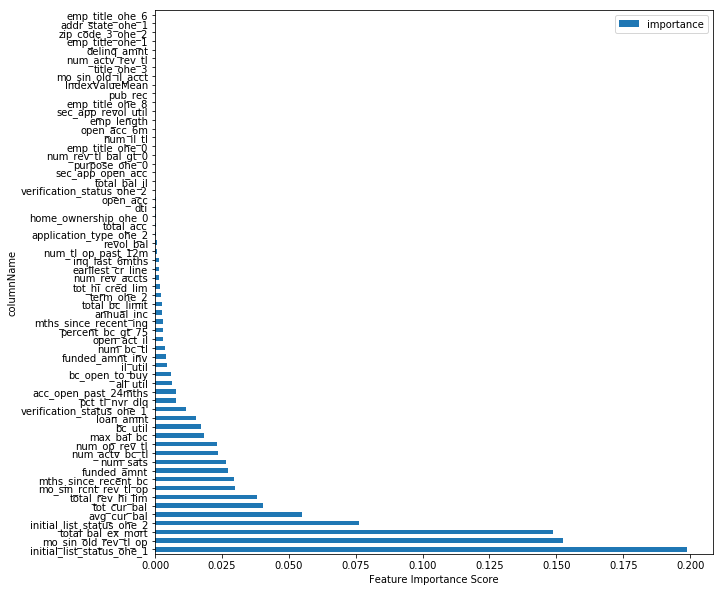

In [106]:
import matplotlib.pyplot as plt
featureImportance.set_index('columnName').plot.barh(figsize=(10,10))#title='Feature Importance', figsize=(8,8))
plt.xlabel('Feature Importance Score')
#plt.ylabel(featureImportance['columnName'].tolist(), rotation=0)
plt.show()